In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Step 1 - Dumb Model

In [41]:
data = pd.read_csv("data/diamonds_train.csv")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
48935,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
48938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [42]:
X, y = (
    data[["carat", "depth", "table", "x", "y", "z"]],
    data["price"],
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([10721.70085884,  -201.57431115,  -101.08048814, -1306.065068  ,
           35.64774112,    56.03793311]),
 20716.059868458455)

Let's define a function that can evaluate a given model

In [44]:
def evaluate_model(model: LinearRegression, X: np.ndarray, y: np.ndarray):
    y_pred = model.predict(X)
    errors_signed = y_pred - y
    errors = np.abs(errors_signed)
    mape_dist = errors_signed / y
    mape = (
        (errors / y).mean().round(3)
    )  # Mean Absolute Error https://c3.ai/glossary/data-science/mean-absolute-percent-error
    mse = (errors**2).mean().round(3)
    print(f"MAPE = {mape}")
    print(f"MSE = {mse}")
    plt.figure(figsize=(22, 7))
    plt.subplot(121)
    plt.scatter(y, errors_signed, alpha=0.3, s=2, c="r")
    plt.title("Error distribution Absolute")
    plt.xlabel("Price")
    plt.ylabel("Error")
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=24))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
    ax.text(
        0.72,
        0.95,
        f"MAPE = {mape}",
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
        fontsize=12,
        color="blue",
    )
    ax.text(
        0.72,
        0.9,
        f"MSE = {mse}",
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
        fontsize=12,
        color="blue",
    )

    plt.subplot(122)
    plt.scatter(y, mape_dist * 100, alpha=0.3, s=2, c="r")
    plt.title("Error distribution Relative")
    plt.xlabel("Price")
    plt.ylabel("Error %")
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=24))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax.text(
        0.72,
        0.95,
        f"MAPE = {mape}",
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
        fontsize=12,
        color="blue",
    )
    ax.text(
        0.72,
        0.9,
        f"MSE = {mse}",
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
        fontsize=12,
        color="blue",
    )
    plt.show()

MAPE = 0.281
MSE = 2238708.769


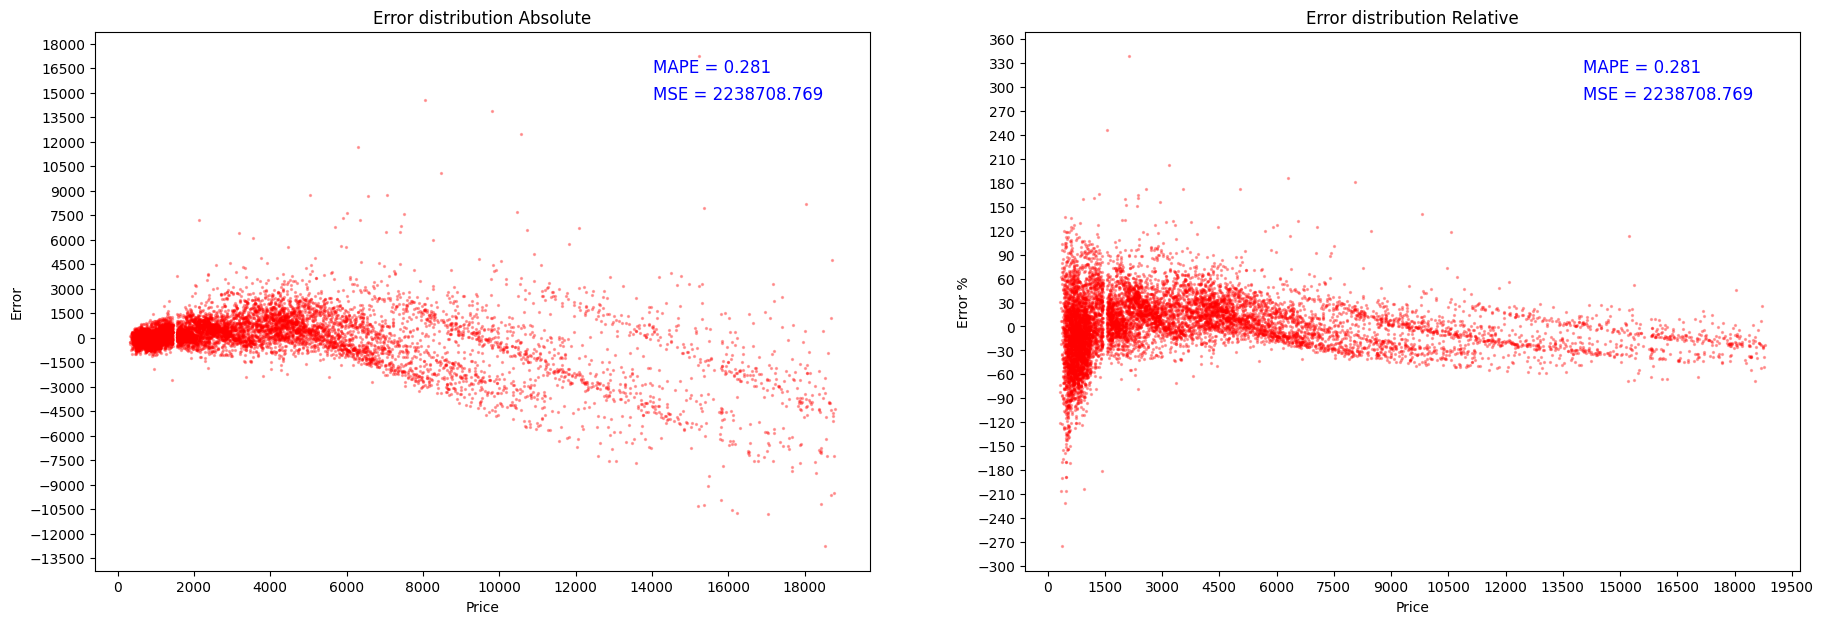

In [45]:
evaluate_model(model, X_test, y_test)

## Step 2 - Linearizing data

Let's try to have an additional column with carat squared.

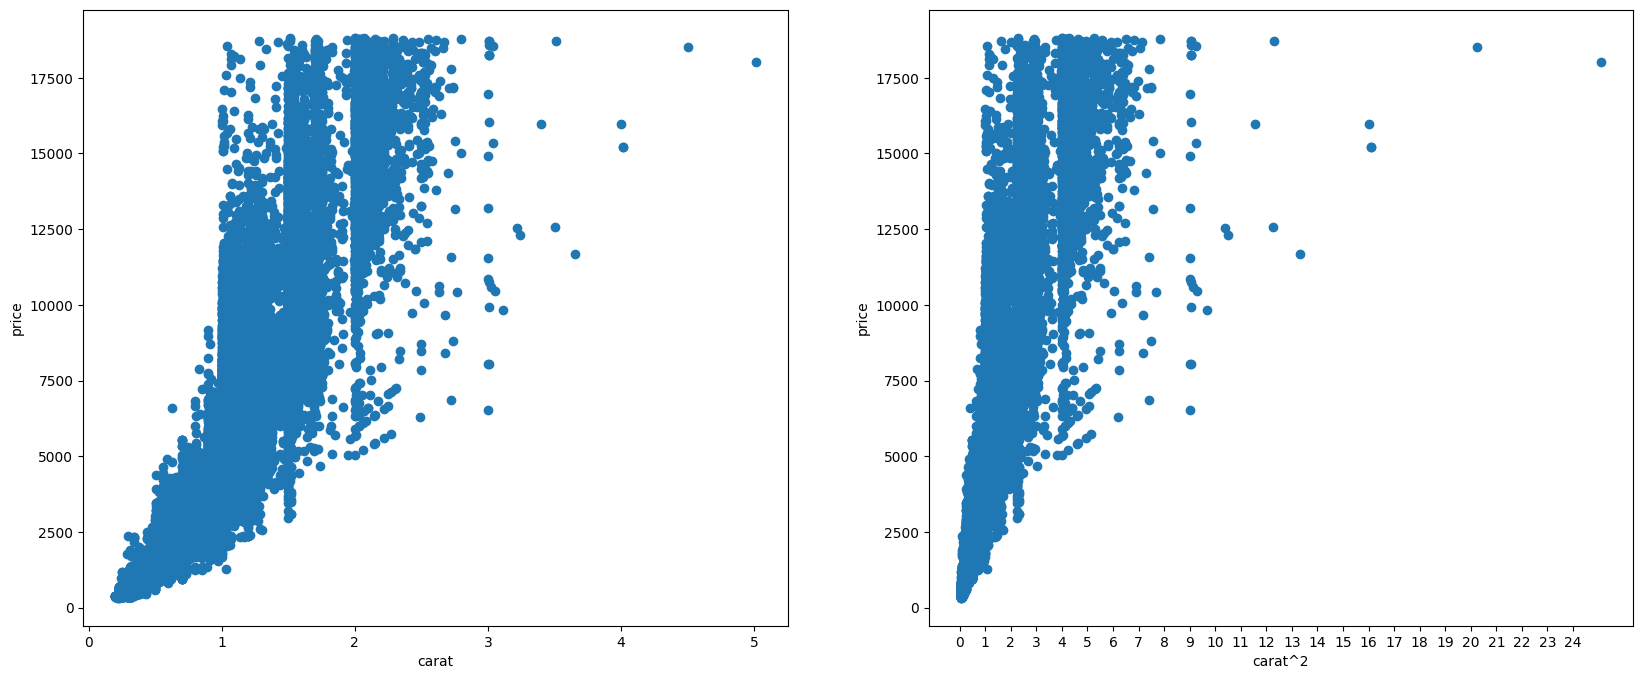

In [46]:
data["carat_squared"] = data["carat"] ** 2

plt.figure(figsize=(20, 8))
plt.subplot(121), plt.xlabel("carat"),
plt.ylabel("price"), plt.xticks(np.arange(0, 25, 1)), plt.scatter(
    data["carat"], data["price"]
)
plt.subplot(122), plt.xlabel("carat^2"), plt.ylabel("price"), plt.xticks(
    np.arange(0, 25, 1)
), plt.scatter(data["carat_squared"], data["price"])
plt.show()

MAPE = 0.278
MSE = 2223263.112


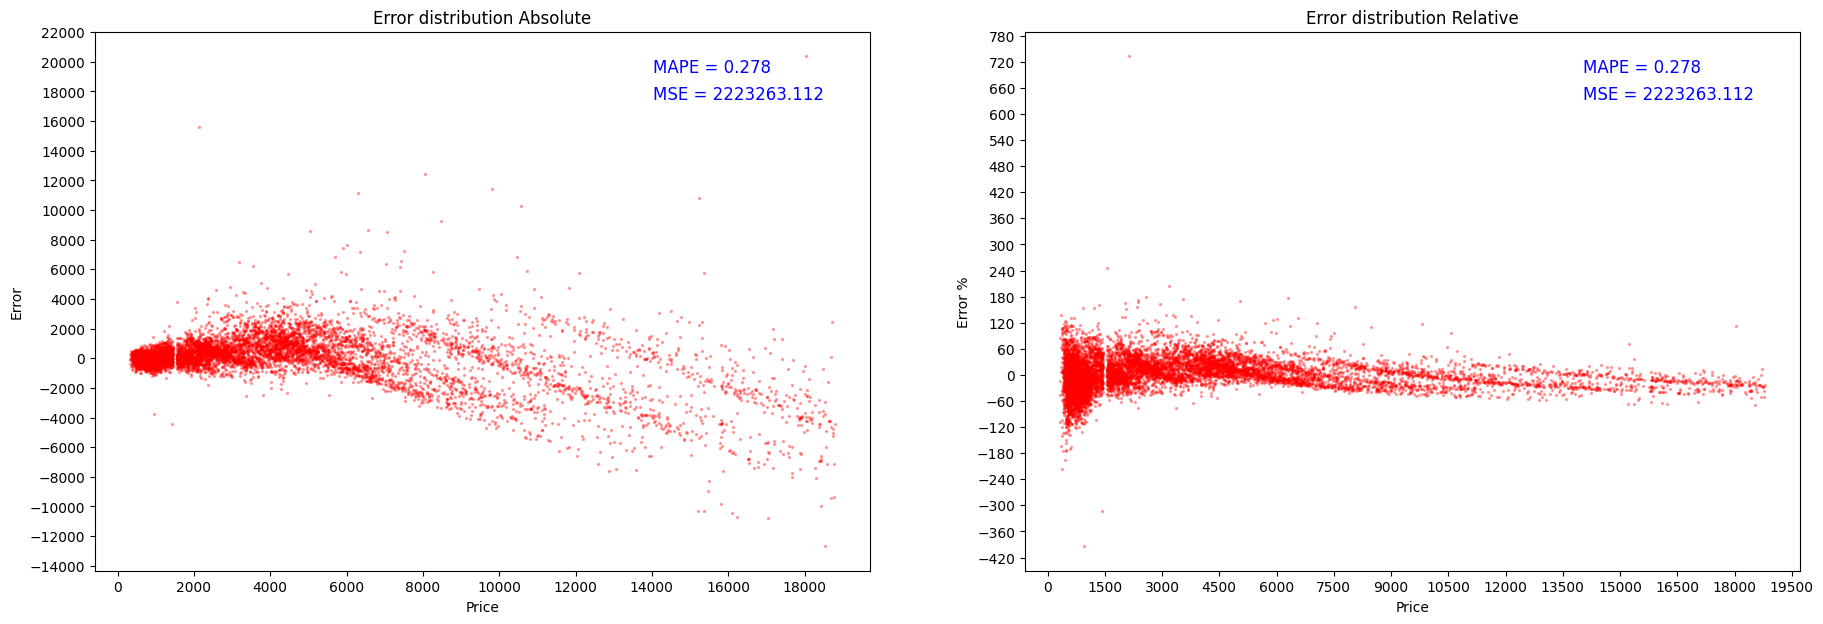

In [47]:
X, y = (
    data[["carat", "carat_squared", "depth", "table", "x", "y", "z"]].to_numpy(),
    data["price"].to_numpy(),
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model, X_test, y_test)

Unfortunately the result is the same, although MSE is very slightly smaller

## Step 3 - Cleaning Data

In [48]:
data["volume"] = data["x"] * data["y"] * data["z"]
data[(data["volume"] > 800)]

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_squared,volume
21806,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,4.0000,3840.59806
43885,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,0.2601,838.50240
44593,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,0.2601,838.50240


In [49]:
data[((data["x"] == 0) | (data["y"] == 0) | (data["z"] == 0))]

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_squared,volume
1997,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1.0000,0.0
2092,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,1.0201,0.0
4339,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1.2100,0.0
4955,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1.0201,0.0
9202,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,2.2500,0.0
10117,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,1.1449,0.0
10815,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,1.0000,0.0
12305,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,1.3225,0.0
14418,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,1.2996,0.0
22101,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,4.7524,0.0


In [50]:
clean_data = data[
    (data["volume"] < 800) & ((data["x"] > 0) & (data["y"] > 0) & (data["z"] > 0))
]
print("Volume outliers removed ", data.shape[0] - clean_data.shape[0])

Volume outliers removed  22


<Axes: >

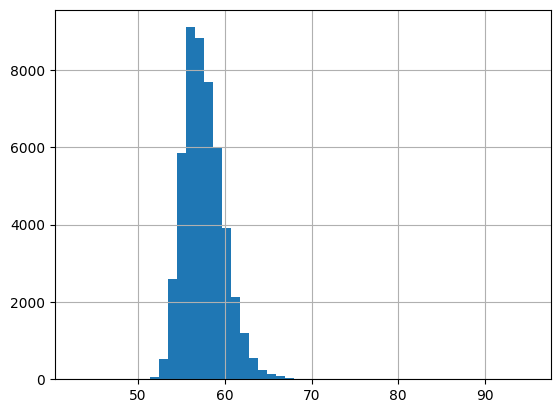

In [51]:
data["table"].hist(bins=50)

In [52]:
lower_limit = data["table"].mean() - 3 * data["table"].std()
upper_limit = data["table"].mean() + 3 * data["table"].std()
lower_limit, upper_limit

(50.73911620345147, 64.17757362082314)

In [53]:
clean_data[(data["table"] < lower_limit) | (data["table"] > upper_limit)]

C:\Users\michael\AppData\Local\Temp\ipykernel_14468\4254605865.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_data[(data["table"] < lower_limit) | (data["table"] > upper_limit)]


,carat,cut,color,clarity,depth,table,price,x,y,z,carat_squared,volume
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0529,38.076885
82,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52,0.7396,143.716320
207,0.84,Fair,G,SI1,55.1,67.0,2782,6.39,6.20,3.47,0.7056,137.474460
268,0.70,Fair,G,VVS1,58.8,66.0,2797,5.81,5.90,3.44,0.4900,117.919760
284,0.76,Fair,G,VS1,59.0,70.0,2800,5.89,5.80,3.46,0.5776,118.200520
...,...,...,...,...,...,...,...,...,...,...,...,...
48577,0.78,Fair,H,VS2,54.7,67.0,2691,6.25,6.15,3.40,0.6084,130.687500
48684,0.71,Fair,F,VS1,57.3,67.0,2707,5.96,5.76,3.36,0.5041,115.347456
48715,0.75,Good,E,VS2,59.7,65.0,2717,5.85,5.80,3.48,0.5625,118.076400
48717,0.70,Fair,H,VVS2,64.5,65.0,2717,5.52,5.45,3.54,0.4900,106.497360


In [54]:
prev_shape = clean_data.shape
clean_data = clean_data[(data["table"] > lower_limit) & (data["table"] < upper_limit)]
print("Table outliers removed ", prev_shape[0] - clean_data.shape[0])

Table outliers removed  295


C:\Users\michael\AppData\Local\Temp\ipykernel_14468\3148518552.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_data = clean_data[(data["table"] > lower_limit) & (data["table"] < upper_limit)]


<Axes: >

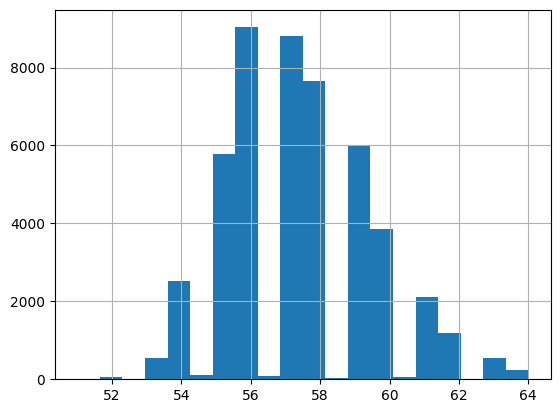

In [55]:
clean_data["table"].hist(bins=20)

<Axes: >

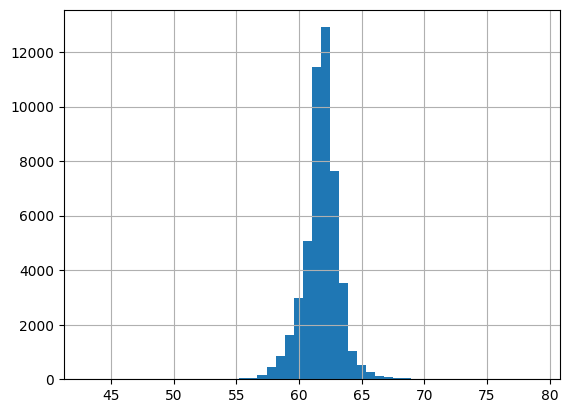

In [56]:
data["depth"].hist(bins=50)

In [57]:
lower_limit = data["depth"].mean() - 3 * data["depth"].std()
upper_limit = data["depth"].mean() + 3 * data["depth"].std()
prev_shape = clean_data.shape
clean_data = clean_data[(data["depth"] > lower_limit) & (data["depth"] < upper_limit)]
print("Depth outliers removed ", prev_shape[0] - clean_data.shape[0])

Depth outliers removed  564


C:\Users\michael\AppData\Local\Temp\ipykernel_14468\1894250985.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_data = clean_data[(data["depth"] > lower_limit) & (data["depth"] < upper_limit)]


<Axes: >

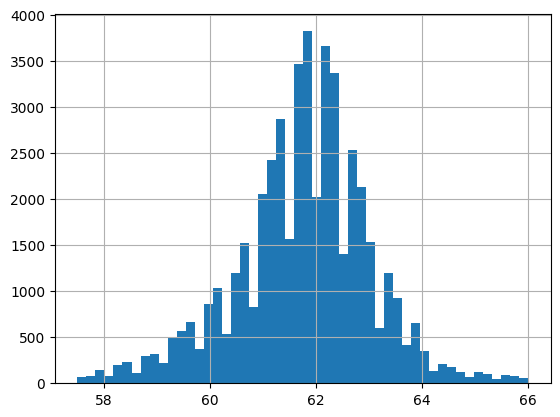

In [58]:
clean_data["depth"].hist(bins=50)

MAPE = 0.257
MSE = 1893965.963


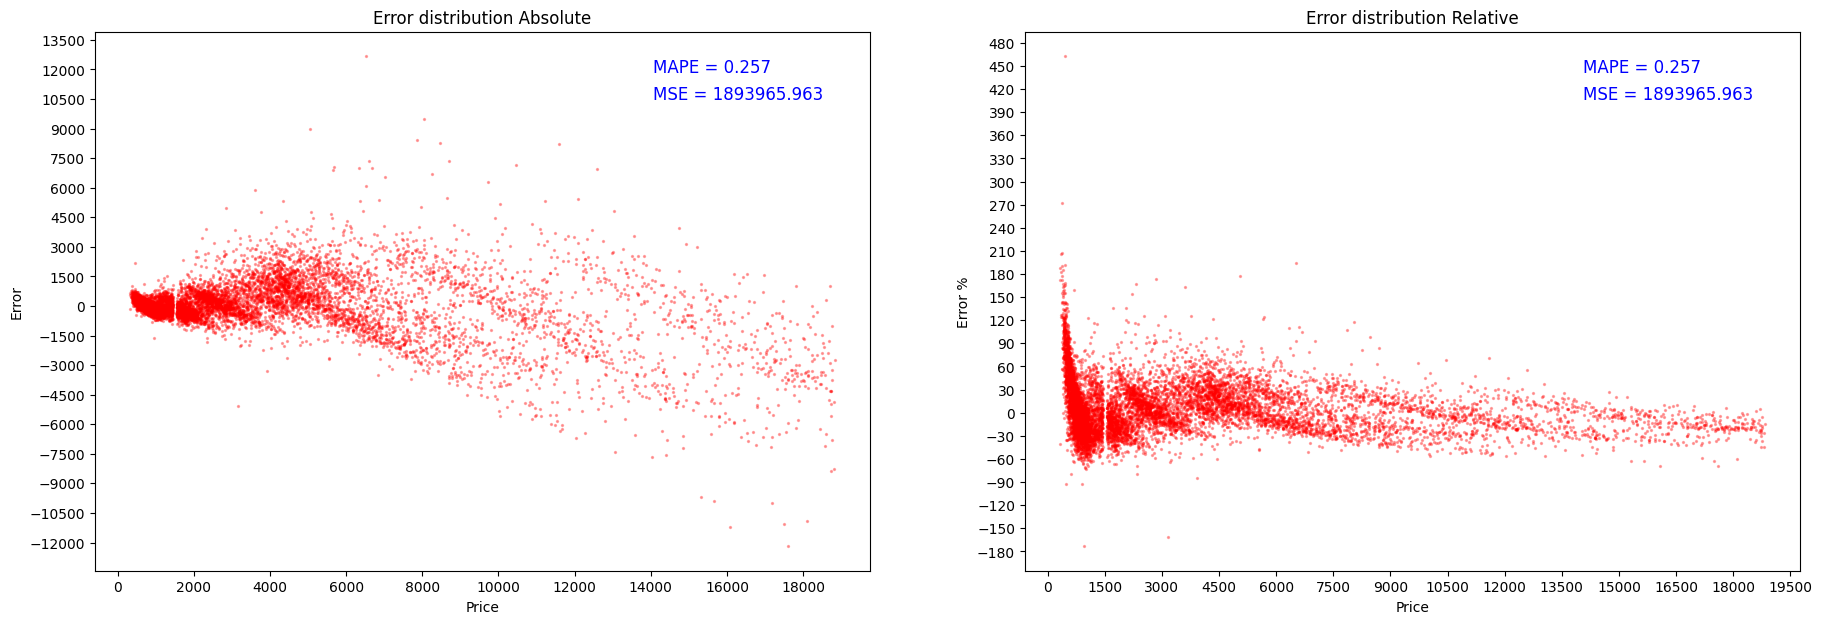

In [59]:
X, y = (
    clean_data[["carat", "carat_squared", "depth", "table", "x", "y", "z", "volume"]].to_numpy(),
    clean_data["price"].to_numpy(),
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model, X_test, y_test)

The result is still very bad

## Step 3 - Adding Categorical Data

In [60]:
cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_mapping = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
clarity_mapping = {
    "I1": 1,
    "SI2": 2,
    "SI1": 3,
    "VS2": 4,
    "VS1": 5,
    "VVS2": 6,
    "VVS1": 7,
    "IF": 8,
}
clean_data["cut_encoded"] = clean_data["cut"].map(cut_mapping)
clean_data["color_encoded"] = clean_data["color"].map(color_mapping)
clean_data["clarity_encoded"] = clean_data["clarity"].map(clarity_mapping)

MAPE = 0.421
MSE = 1244293.957


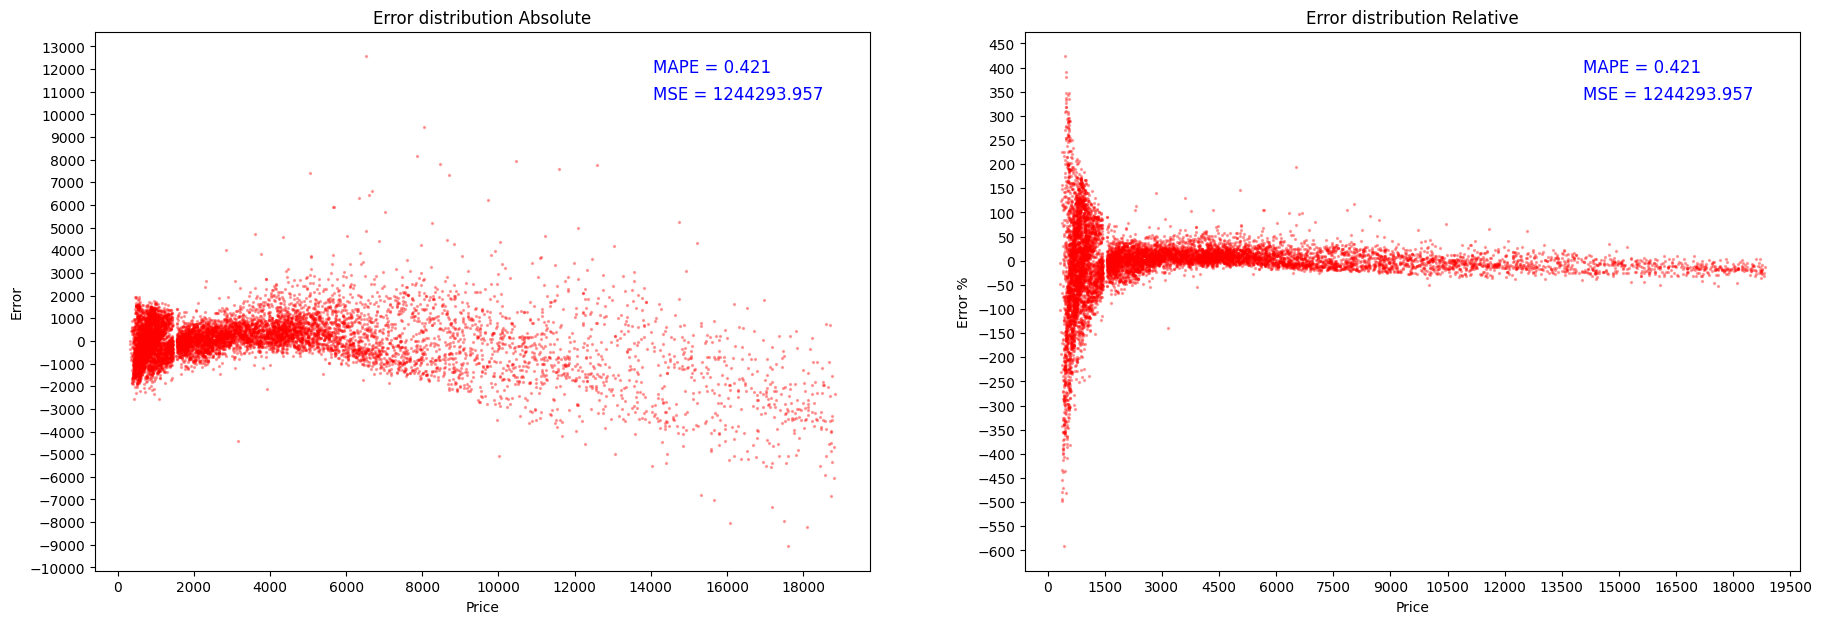

In [61]:
X, y = (
    clean_data[
        [
            "carat",
            "carat_squared",
            "cut_encoded",
            "color_encoded",
            "clarity_encoded",
            "depth",
            "table",
            "x",
            "y",
            "z",
            "volume",
        ]
    ].to_numpy(),
    clean_data["price"].to_numpy(),
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model, X_test, y_test)

Mean squared error fell almost twice, but mean percentage error grew twice. I assume this is because linear regression optimizes for MSE, and not for MAPE.

## Step 4 - Better Categorization

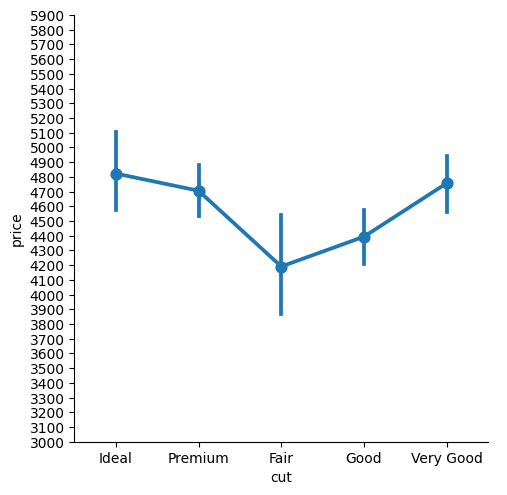

In [62]:
selection = clean_data[clean_data['carat'] <= 1.0]
selection = selection[selection['carat'] >= 0.9]
selection = selection[selection['color']=='F']
#selection = selection[selection['cut']=='Good']
catplot = sns.catplot(data=selection, x='cut', y='price', kind="point")
ax = catplot.ax
ax.set_yticks(np.arange(3000, 6000, 100))
plt.show()


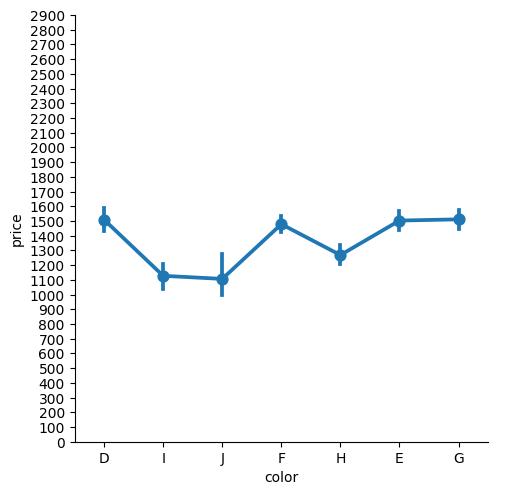

In [63]:
selection = clean_data[clean_data['carat'] <= 0.6]
selection = selection[selection['carat'] >= 0.5]
#selection = selection[selection['color']=='F']
selection = selection[selection['cut']=='Good']
catplot = sns.catplot(data=selection, x='color', y='price', kind="point")
ax = catplot.ax
ax.set_yticks(np.arange(0, 3000, 100))
plt.show()

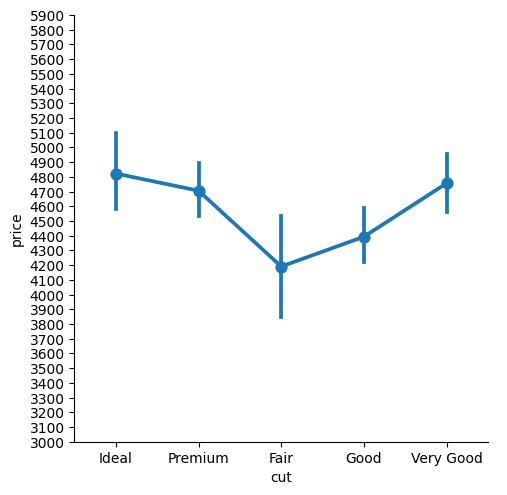

In [64]:
selection = clean_data[clean_data['carat'] <= 1.0]
selection = selection[selection['carat'] >= 0.9]
selection = selection[selection['color']=='F']
#selection = selection[selection['cut']=='Good']
catplot = sns.catplot(data=selection, x='cut', y='price', kind="point")
ax = catplot.ax
ax.set_yticks(np.arange(3000, 6000, 100))
plt.show()

In [65]:
cut_mapping = {"Fair": 4200, "Good": 4400, "Very Good": 4750, "Premium": 4800, "Ideal": 4850}
color_mapping = {"J": 1050, "I": 1100, "H": 1250, "G": 1460, "F": 1470, "E": 1500, "D": 1530}
clarity_mapping = {
    "I1": 850,
    "SI2": 1050,
    "SI1": 1250,
    "VS2": 1450,
    "VS1": 1600,
    "VVS2": 1800,
    "VVS1": 1900,
    "IF": 2000,
}
clean_data["cut_encoded"] = clean_data["cut"].map(cut_mapping)
clean_data["color_encoded"] = clean_data["color"].map(color_mapping)
clean_data["clarity_encoded"] = clean_data["clarity"].map(clarity_mapping)


MAPE = 0.415
MSE = 1201843.348


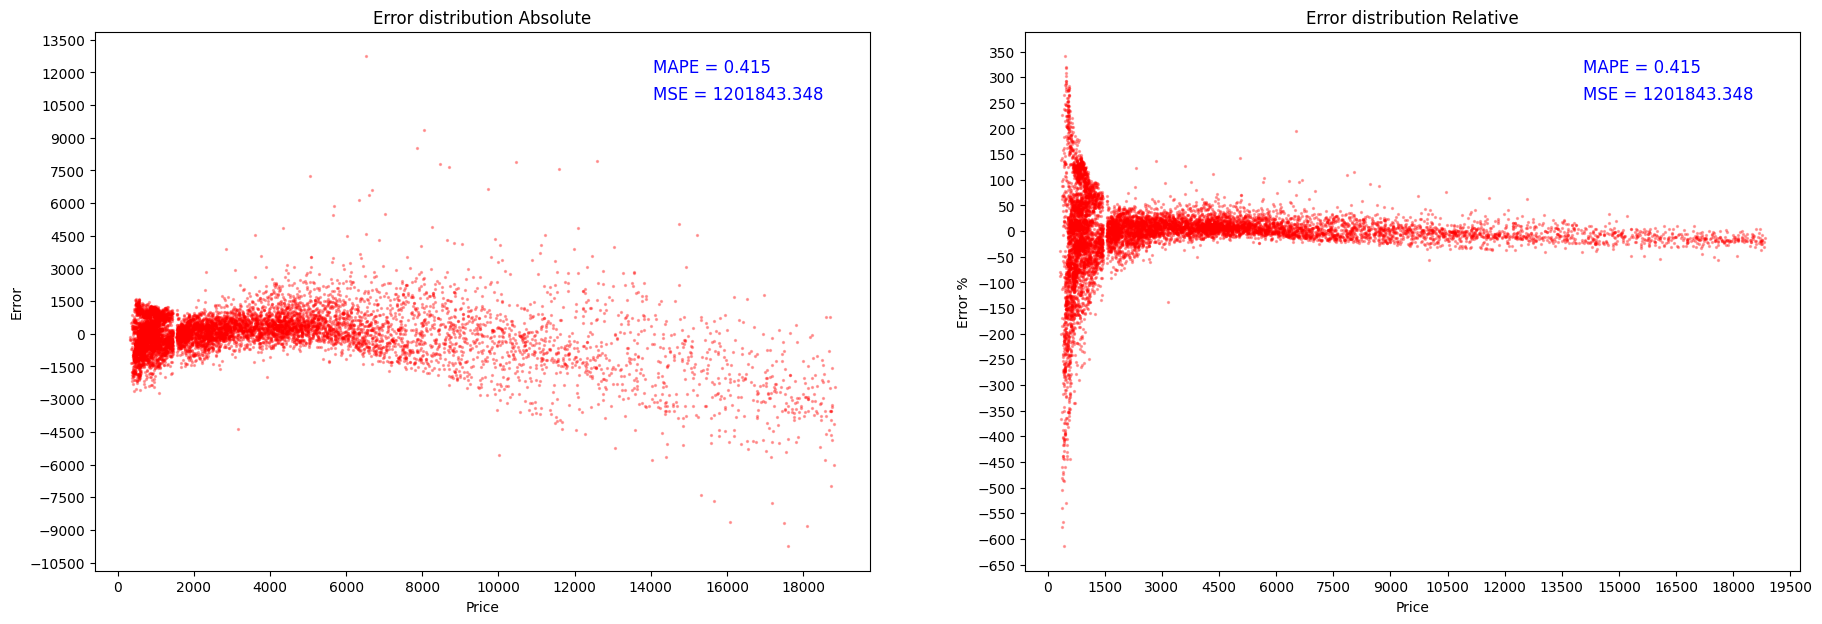

In [66]:
X, y = (
    clean_data[
        [
            "carat",
            "carat_squared",
            "cut_encoded",
            "color_encoded",
            "clarity_encoded",
            "depth",
            "table",
            "x",
            "y",
            "z",
            "volume",
        ]
    ].to_numpy(),
    clean_data["price"].to_numpy(),
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model, X_test, y_test)

Using better categorical encoding has a very negligible positive effect 

## Step 5 - Adding Polynomial Features

In [67]:
poly = PolynomialFeatures(degree=2, include_bias=True)
clean_data_numerical = clean_data[
    [
        "carat",
        "cut_encoded",
        "color_encoded",
        "clarity_encoded",
        "depth",
        "table",
        "x",
        "y",
        "z",
        "volume",
    ]
]
poly_features = poly.fit_transform(clean_data_numerical)
poly_data = pd.DataFrame(
    poly_features, columns=poly.get_feature_names_out(clean_data_numerical.columns)
)
poly_price = clean_data["price"]

MAPE = 0.165
MSE = 566388.389


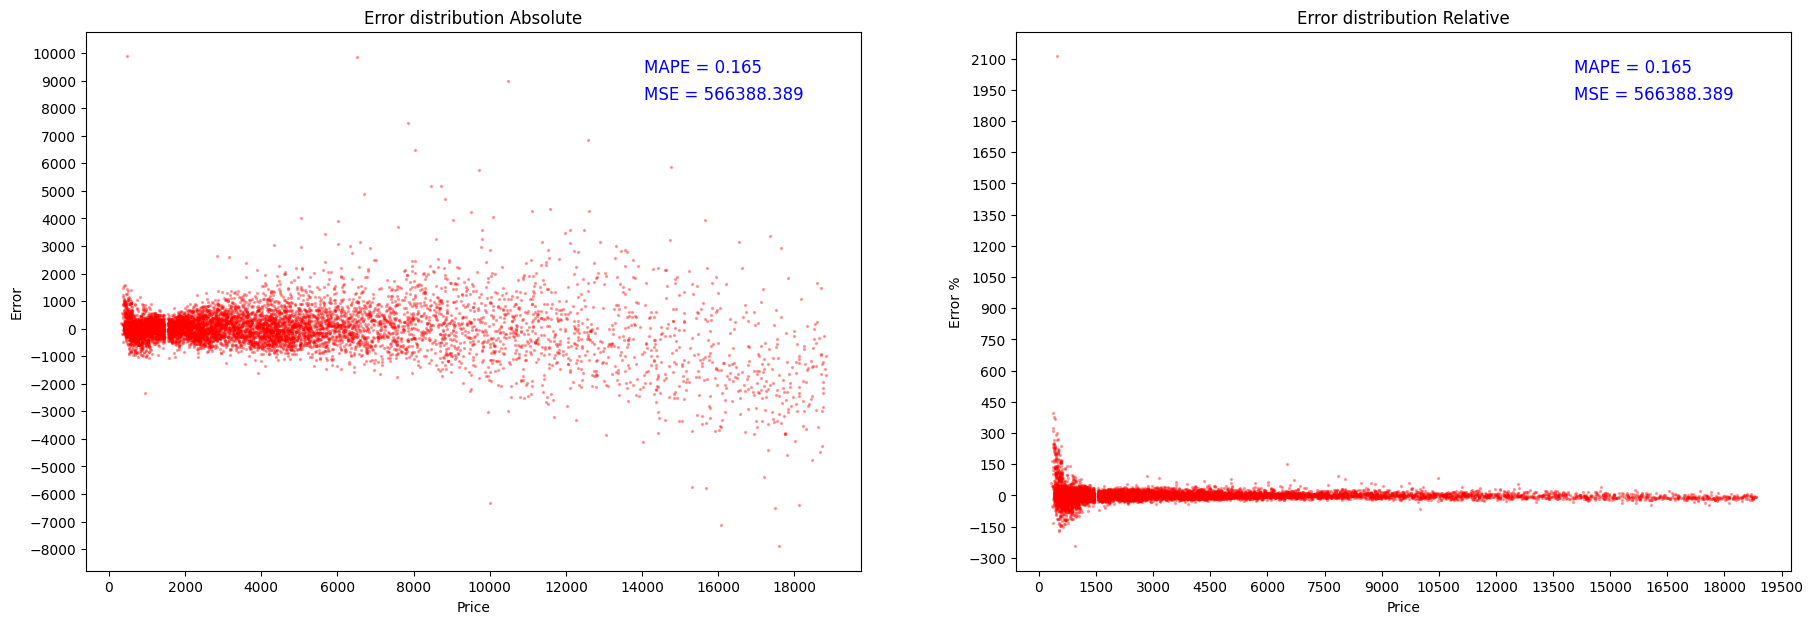

In [68]:
X, y = (poly_data.to_numpy(), poly_price.to_numpy())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model, X_test, y_test)

## Step 5 - Multiple Models

Let's try to build two models, one for cheaper diamonds and one for more expensive diamonds

In [69]:
PRICE_CUT = 1500

MAPE = 0.079
MSE = 7749.906


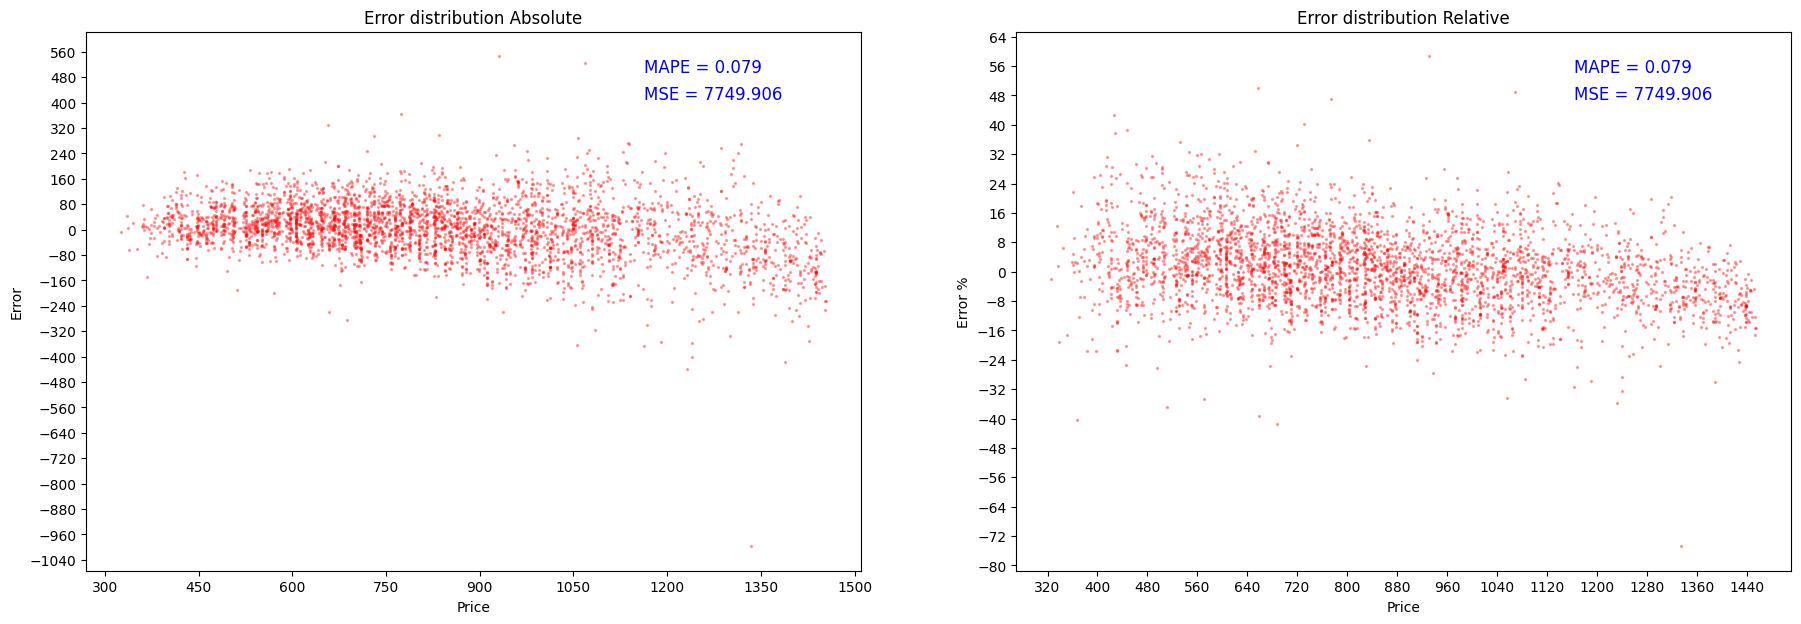

In [70]:
poly = PolynomialFeatures(degree=2, include_bias=True)
clean_data_numerical = clean_data[clean_data["price"] <= PRICE_CUT]
clean_data_numerical = clean_data_numerical[
    [
        "carat",
        "cut_encoded",
        "color_encoded",
        "clarity_encoded",
        "depth",
        "table",
        "x",
        "y",
        "z",
        "volume",
    ]
]
poly_features = poly.fit_transform(clean_data_numerical)
poly_data = pd.DataFrame(
    poly_features, columns=poly.get_feature_names_out(clean_data_numerical.columns)
)
poly_price = clean_data[clean_data["price"] <= PRICE_CUT]
poly_price = poly_price["price"]
X, y = (poly_data.to_numpy(), poly_price.to_numpy())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model_cheap = LinearRegression()
model_cheap.fit(X_train, y_train)
evaluate_model(model_cheap, X_test, y_test)

MAPE = 0.109
MSE = 1417867.702


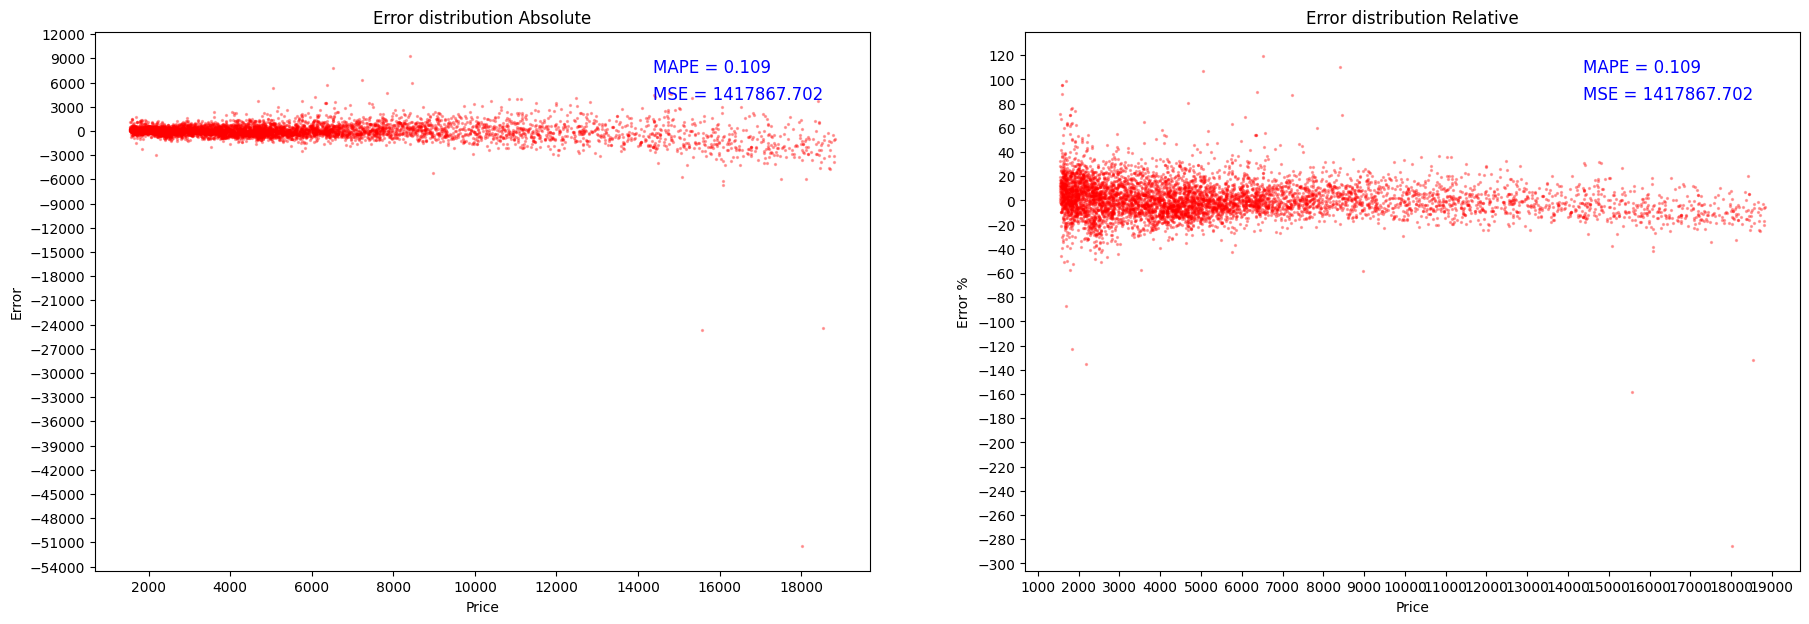

In [71]:
poly = PolynomialFeatures(degree=2, include_bias=True)
clean_data_numerical = clean_data[clean_data["price"] > PRICE_CUT]
clean_data_numerical = clean_data_numerical[
    [
        "carat",
        "cut_encoded",
        "color_encoded",
        "clarity_encoded",
        "depth",
        "table",
        "x",
        "y",
        "z",
        "volume",
    ]
]
poly_features = poly.fit_transform(clean_data_numerical)
poly_data = pd.DataFrame(
    poly_features, columns=poly.get_feature_names_out(clean_data_numerical.columns)
)
poly_price = clean_data[clean_data["price"] > PRICE_CUT]
poly_price = poly_price["price"]
X, y = (poly_data.to_numpy(), poly_price.to_numpy())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model_expensive = LinearRegression()
model_expensive.fit(X_train, y_train)
evaluate_model(model_expensive, X_test, y_test)

## Step 6 - Choosing which Model to Run

It seems the result is much better if we split the model into two models - cheap and expensive. However, now we need to figure out out when to run cheap model and when to run expensive model, because obviously we will not have the information about prices available when running the model in production. We can try to use SVM or kNN algorithm to decide which model to run on a given sample. Let's try to use SVM.

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clean_data["model_type"] = (clean_data["price"] > 1500).astype(int)
X, y = (
    clean_data[
        [
            "carat",
            "cut_encoded",
            "color_encoded",
            "clarity_encoded",
            "depth",
            "table",
            "x",
            "y",
            "z",
            "volume",
        ]
    ].to_numpy(),
    clean_data["model_type"].to_numpy(),
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier = SVC(kernel="linear", C=1.0, random_state=42)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.982521847690387


In [73]:
class MultiModel:
    def __init__(
        self,
        model_cheap: LinearRegression,
        model_expensive: LinearRegression,
        classifier: SVC,
    ):
        self.__model_cheap = model_cheap
        self.__model_expensive = model_expensive
        self.__classifier = classifier

    def predict(self, X):
        y_cheap = self.__model_cheap.predict(X.to_numpy())
        y_expensive = self.__model_expensive.predict(X.to_numpy())
        X_classification = X[
            [
                "carat",
                "cut_encoded",
                "color_encoded",
                "clarity_encoded",
                "depth",
                "table",
                "x",
                "y",
                "z",
                "volume",
            ]
        ].to_numpy()
        scaler = StandardScaler()
        X_classification = scaler.fit_transform(X_classification)
        labels = self.__classifier.predict(X_classification)
        
        y = []
        for index in range(0, len(X)):
            if labels[index] == 0:
                y.append(y_cheap[index])
            else:
                y.append(y_expensive[index])
        return y

MAPE = 0.099
MSE = 491481.343


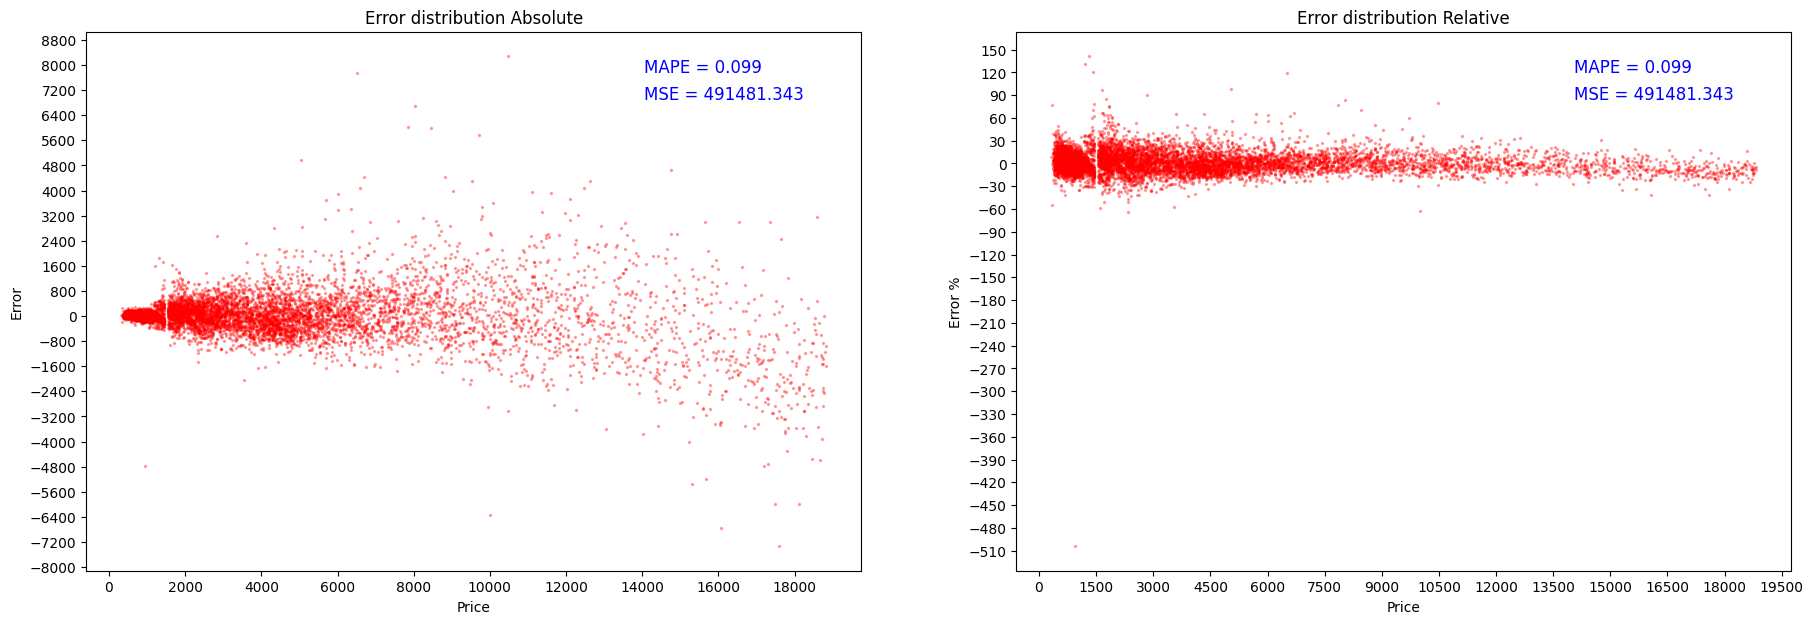

In [76]:
poly = PolynomialFeatures(degree=2, include_bias=True)
clean_data_numerical = clean_data[
    [
        "carat",
        "cut_encoded",
        "color_encoded",
        "clarity_encoded",
        "depth",
        "table",
        "x",
        "y",
        "z",
        "volume",
    ]
]
poly_features = poly.fit_transform(clean_data_numerical)
poly_data = pd.DataFrame(
    poly_features, columns=poly.get_feature_names_out(clean_data_numerical.columns)
)
poly_price = clean_data["price"]
X_train, X_test, y_train, y_test = train_test_split(
    poly_data, poly_price, test_size=0.2, random_state=42
)

model = MultiModel(model_cheap, model_expensive, classifier)

model.predict(X_test)
evaluate_model(model, X_test, y_test)

MAPE is 0.099, whic is much better than before. Let's just also have a look at expected and predicted values side by side.

In [83]:
y_pred = model.predict(X_test)
y_expected = y_test.to_numpy()
random_indices = np.random.randint(0, len(y_expected), size=25)
for index in random_indices:
    print(y_expected[index], y_pred[index])

2652 2484.5758297293214
523 566.5861930229003
3180 2821.658755835262
5045 5133.809480813565
1017 946.5442426808877
1822 1760.1285736046266
5050 4393.796230422333
1212 1381.5864316558
536 580.757780021755
17548 14296.780868786504
689 832.8628278314136
1689 1860.9086900880793
4077 3669.9813250883017
8006 7773.747087150114
8235 8980.852290749666
4781 4283.2684263509
2573 2171.221507818904
7318 8604.966501346906
1919 1689.3559804202523
2036 1857.1248339579906
1448 1083.7362681052182
1806 1835.1949477444869
10282 9754.713822122081
730 790.2828974871663
3082 3376.679332072381
